In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras

from sklearn import svm

import numpy as np

In [2]:
# Direct Kernel Set Training Data
dks_train_1 = pd.read_csv('data/Direct_Kernel_Set_I_Training.csv')
dks_train_2 = pd.read_csv('data/Direct_Kernel_Set_II_Training.csv')
dks_train_3 = pd.read_csv('data/Direct_Kernel_Set_III_Training.csv')

# Direct Kernel Set Classifcation Data
dks_class_1 = pd.read_csv('data/Direct_Kernel_Set_I_Classifications.csv')
dks_class_2 = pd.read_csv('data/Direct_Kernel_Set_II_Classifications.csv')

# Direct Kernel Set Classication Results Only Data
dks_results_1 = pd.read_csv('data/Direct_Kernel_Set_I_Classifications_ResultsOnly.csv')
dks_results_2 = pd.read_csv('data/Direct_Kernel_Set_II_Classifications_ResultsOnly.csv')
dks_results_3 = pd.read_csv('data/Direct_Kernel_Set_III_Classifications_ResultsOnly.csv')

In [3]:
# Variational Set 1 Training Data
var_train_1d0 = pd.read_csv('data/Variational_Set_I_d0_Training.csv')
var_train_1d1 = pd.read_csv('data/Variational_Set_I_d1_Training.csv')
var_train_1d2 = pd.read_csv('data/Variational_Set_I_d2_Training.csv')
var_train_1d3 = pd.read_csv('data/Variational_Set_I_d3_Training.csv')
var_train_1d4 = pd.read_csv('data/Variational_Set_I_d4_Training.csv')


# Variational Set 2 Training Data
var_train_2d0 = pd.read_csv('data/Variational_Set_II_d0_Training.csv')
var_train_2d1 = pd.read_csv('data/Variational_Set_II_d1_Training.csv')
var_train_2d2 = pd.read_csv('data/Variational_Set_II_d2_Training.csv')
var_train_2d3 = pd.read_csv('data/Variational_Set_II_d3_Training.csv')
var_train_2d4 = pd.read_csv('data/Variational_Set_II_d4_Training.csv')


# Variational Set 3 Training Data
var_train_2d0 = pd.read_csv('data/Variational_Set_III_d0_Training.csv')
var_train_2d1 = pd.read_csv('data/Variational_Set_III_d1_Training.csv')
var_train_2d2 = pd.read_csv('data/Variational_Set_III_d2_Training.csv')
var_train_2d3 = pd.read_csv('data/Variational_Set_III_d3_Training.csv')
var_train_2d4 = pd.read_csv('data/Variational_Set_III_d4_Training.csv')

# Variational Set 1 Classification Results Only Data
var_class_results_1d0 = pd.read_csv('data/Variational_Set_I_d0_Classifications_ResultsOnly.csv')
var_class_results_1d1 = pd.read_csv('data/Variational_Set_I_d1_Classifications_ResultsOnly.csv')
var_class_results_1d2 = pd.read_csv('data/Variational_Set_I_d2_Classifications_ResultsOnly.csv')
var_class_results_1d3 = pd.read_csv('data/Variational_Set_I_d3_Classifications_ResultsOnly.csv')
var_class_results_1d4 = pd.read_csv('data/Variational_Set_I_d4_Classifications_ResultsOnly.csv')

# Variational Set 2 Classification Results Only Data
var_class_results_2d0 = pd.read_csv('data/Variational_Set_II_d0_Classifications_ResultsOnly.csv')
var_class_results_2d1 = pd.read_csv('data/Variational_Set_II_d1_Classifications_ResultsOnly.csv')
var_class_results_2d2 = pd.read_csv('data/Variational_Set_II_d2_Classifications_ResultsOnly.csv')
var_class_results_2d3 = pd.read_csv('data/Variational_Set_II_d3_Classifications_ResultsOnly.csv')
var_class_results_2d4 = pd.read_csv('data/Variational_Set_II_d4_Classifications_ResultsOnly.csv')

# Variational Set 3 Classification Results Only Data
var_class_results_3d0 = pd.read_csv('data/Variational_Set_III_d0_Classifications_ResultsOnly.csv')
var_class_results_3d1 = pd.read_csv('data/Variational_Set_III_d1_Classifications_ResultsOnly.csv')
var_class_results_3d2 = pd.read_csv('data/Variational_Set_III_d2_Classifications_ResultsOnly.csv')
var_class_results_3d3 = pd.read_csv('data/Variational_Set_III_d3_Classifications_ResultsOnly.csv')
var_class_results_3d4 = pd.read_csv('data/Variational_Set_III_d4_Classifications_ResultsOnly.csv')

In [4]:
len(dks_class_1)

440

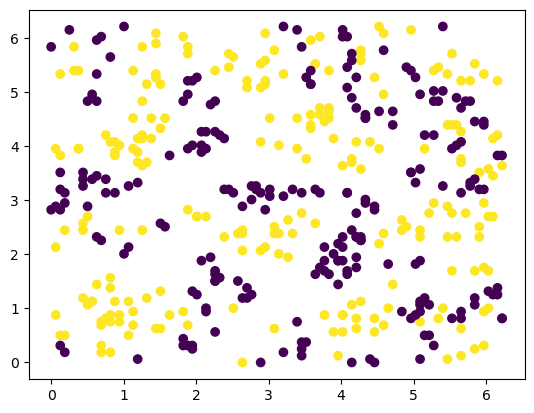

In [5]:
plt.scatter(dks_class_1.iloc[:, 1], dks_class_1.iloc[:, 2], c = dks_class_1.iloc[:, 3])
plt.show()

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_shape=(2,), activation = 'tanh'),
    tf.keras.layers.Dense(4, activation = 'tanh'),
    tf.keras.layers.Dense(4, activation = 'tanh'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.BinaryCrossentropy(), #
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [26]:
idx = np.random.permutation(np.arange(0, len(dks_class_1)))

In [27]:
batch_size = 16
epochs = 100

x_train = dks_class_1.iloc[idx, 1:3].values
x_train = x_train/np.max(x_train)
y_train = dks_class_1.iloc[idx, 3].values
y_train = (y_train + 1)/2

# x_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# y_train = np.array([0, 1, 1, 0])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.5091
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4977
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5545
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4795
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5341
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5523
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5773
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.4659
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.5136
Epoch 11/

28/28 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.4909
Epoch 84/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5045
Epoch 85/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 86/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5364
Epoch 87/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 88/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4773
Epoch 89/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4682
Epoch 90/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4909
Epoch 91/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4955
Epoch 92/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4682
Epoch 93/100


In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 8) dtype=float32, numpy=
 array([[-0.6603771 ,  1.3625131 ,  0.2276954 ,  1.7252355 , -1.3968791 ,
         -0.6006656 ,  0.9548948 ,  1.0066738 ],
        [-0.6993562 ,  1.1008155 ,  1.4659303 ,  1.5818853 , -1.317614  ,
         -0.70542115,  0.15039094,  0.33279395]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([ 0.8429604 , -0.05648553, -0.9008907 , -0.03249232, -0.28652424,
         0.8065953 , -0.4560756 , -0.7709341 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-1.1173877 ,  0.00232627,  0.9895335 , -1.677245  ],
        [-0.15574275,  0.7395119 , -0.67757833,  1.7355778 ],
        [ 1.6688085 ,  0.47557124, -1.2823721 ,  1.4621947 ],
        [-0.35059562,  0.41134658, -1.1745315 ,  1.7229383 ],
        [ 0.6696393 , -0.92524904,  1.3597511 , -1.4862262 ],
        [-0.9204161 , -0.7017491 ,  1.9694486 , -1.8287534 ],
        [ 1.3647654 ,  0.33369

In [10]:
model.predict(x_train)

array([[0.00220724],
       [0.99691546],
       [0.9969362 ],
       [0.00611575]], dtype=float32)

In [28]:
x1_vals = np.linspace(0, 6, 15)
x2_vals = np.linspace(0, 6, 15)

thing = []

for x1 in x1_vals:
    for x2 in x2_vals:
        y_pred = model.predict(np.array([x1/6, x2/6]).reshape((1, 2)))[0,0]
        col = 0 if y_pred < 0.5 else 1
        thing.append([x1, x2, col])
thing = np.array(thing)

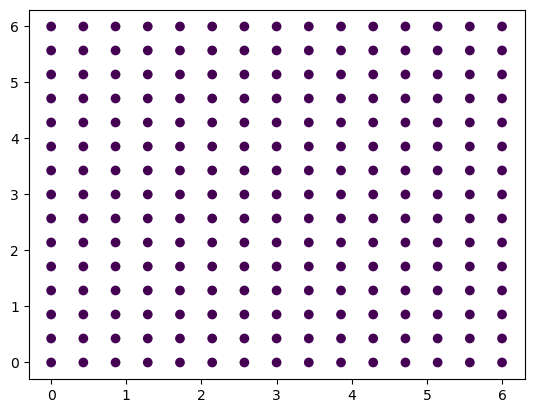

In [29]:
plt.scatter(thing[:,0], thing[:,1], c = thing[:,2])
plt.show()

In [13]:
x_train = dks_class_1.iloc[idx, 1:3]
y_train = dks_class_1.iloc[idx, 3]

x_test = dks_train_1.iloc[:, 1:3]
y_test = dks_train_1.iloc[:, 3]

In [14]:
svm_model = svm.SVC(C = 5, kernel = "rbf", gamma = 5)
svm_model.fit(x_train, y_train)

SVC(C=5, gamma=5)

In [15]:
y_pred = svm_model.predict(x_test)

In [16]:
np.mean((y_test - y_pred)**2)

0.3

In [17]:
np.mean(y_test == y_pred)

0.925

In [18]:
x_train

,Data,Unnamed: 2
279,4.461062,2.890265
38,0.879646,4.084070
225,1.884956,5.215044
47,0.816814,1.570796
82,3.141593,4.021239
...,...,...
127,2.513274,5.654867
31,6.031858,3.581416
277,5.403539,6.220353
321,2.010619,1.256637


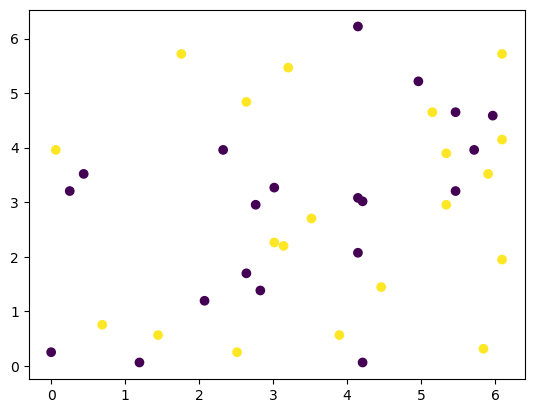

In [19]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test)
plt.show()

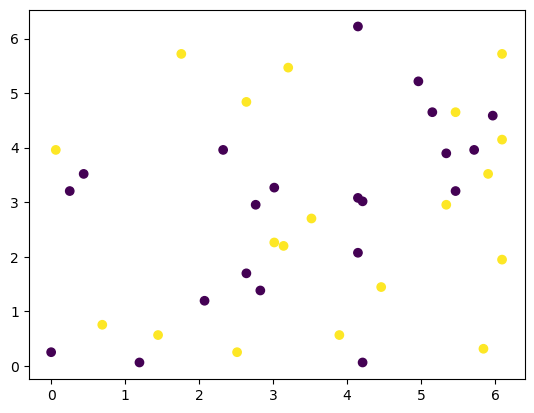

In [20]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_pred)
plt.show()

In [21]:
svm_model.support_

array([  6,   7,  19,  20,  21,  27,  34,  40,  42,  45,  52,  57,  64,
        70,  74,  81,  82,  95,  96,  98, 109, 119, 121, 128, 132, 134,
       136, 137, 141, 150, 164, 166, 180, 184, 185, 189, 196, 199, 203,
       208, 217, 221, 225, 231, 233, 242, 244, 245, 248, 255, 256, 258,
       260, 265, 267, 269, 271, 278, 279, 283, 292, 300, 302, 315, 320,
       321, 328, 330, 331, 332, 342, 346, 351, 353, 356, 358, 364, 368,
       371, 372, 374, 380, 390, 394, 395, 396, 398, 406, 417, 419, 420,
       424, 425, 428, 431, 437, 439,   3,   9,  10,  13,  29,  30,  31,
        37,  38,  56,  61,  63,  65,  72,  73,  76,  79,  80,  84,  87,
        88,  92,  97, 103, 105, 107, 112, 115, 116, 117, 120, 123, 125,
       131, 133, 138, 139, 140, 146, 147, 155, 156, 157, 159, 160, 168,
       173, 174, 178, 179, 183, 187, 188, 192, 193, 197, 198, 200, 214,
       219, 226, 227, 229, 234, 235, 237, 266, 273, 274, 275, 276, 280,
       285, 289, 290, 293, 297, 298, 305, 310, 314, 317, 318, 32